# Data Analysis With friends

Welcome to this project were 3 friends analyze Fifa 20 player data. The goal of this project is to improve the following 
skills.

1. Data analysis
2. Data vidsualization
3. Python and R programming skills

Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from jinja2 import Environment, FileSystemLoader
from IPython.display import display, HTML
import mpld3

## Data Inspection
Make note of the olumn names and what they describe. Notice the shape of the df how many rows by how many columns. Check if the data is clean or not.


In [2]:
player_data = pd.read_csv('data/players_20.csv')
player_data_w_dropped_cols = player_data.drop(columns=['player_url', 'long_name', 'real_face'])
drop_cols1 = ['player_url', 'long_name', 'real_face']
player_data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

After inspecting the csv file we noticed that the following columns are not useful for data analysis and provide no real insight. 
drop_cols1 = ['player_url', 'long_name', 'real_face']

## Creating separate Dataframes 

Now we are going to split the dataframe into separate parts. For example, we could just want a df that focuses on physical body attributes such as **height** and **weight**.

In [3]:
# Create a new df that is the copy of original df
body_attrs_df = player_data.copy()
body_attrs_df = body_attrs_df.loc[:, ['sofifa_id', 'short_name', 'age', 'height_cm', 'weight_kg']]  # Keep only the desired columns
#This df is going to be used to create some visualizations of Fifa players body stats
body_attrs_df.describe()

,sofifa_id,age,height_cm,weight_kg
count,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343
std,27960.200461,4.656964,6.756961,7.047744
min,768.000000,16.000000,156.000000,50.000000
25%,204445.500000,22.000000,177.000000,70.000000
50%,226165.000000,25.000000,181.000000,75.000000
75%,240795.750000,29.000000,186.000000,80.000000
max,252905.000000,42.000000,205.000000,110.000000


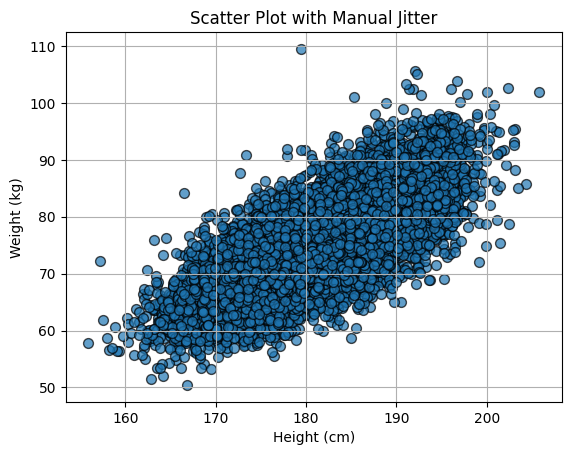

In [4]:
"""# Assuming 'body_attrs_dff' is the DataFrame with the 'height_cm' and 'weight_kg' columns
plt.figure(figsize=(6, 4))  # Set the figure size
plt.scatter(body_attrs_df['height_cm'], body_attrs_df['weight_kg'], s=50, alpha=0.7, edgecolors='k', jitter=0.2)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Relationship between Height, and Weight')
plt.grid()
plt.show()"""

# Generate random jitter values
jitter_x = np.random.uniform(-1.5, 1.5, size=len(body_attrs_df))
jitter_y = np.random.uniform(-1.5, 1.5, size=len(body_attrs_df))

# Plot the scatter plot with jitter
plt.scatter(body_attrs_df['height_cm'] + jitter_x, body_attrs_df['weight_kg'] + jitter_y, s=50, alpha=0.7, edgecolors='k')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Scatter Plot with Manual Jitter')
plt.grid()
plt.show()


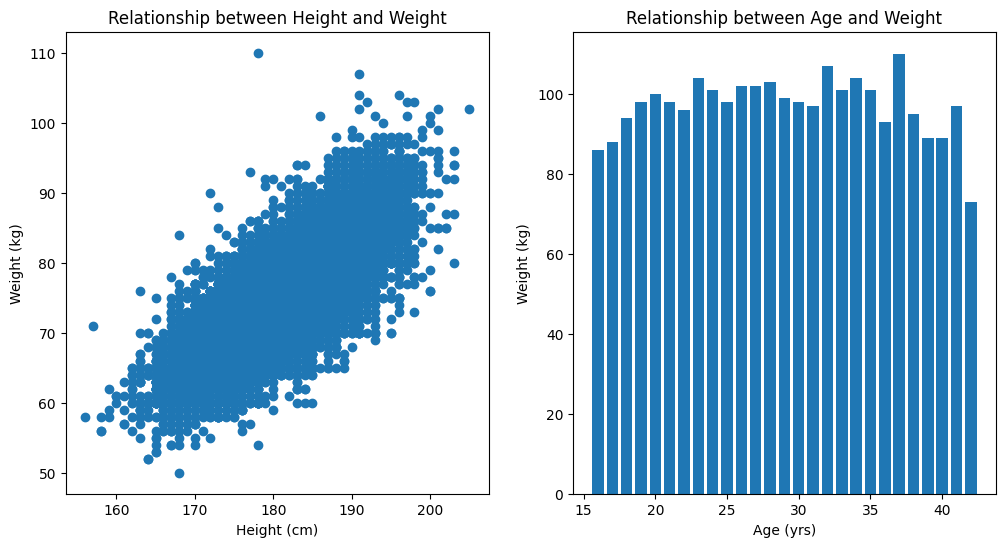

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot 1
ax1.scatter(body_attrs_df['height_cm'], body_attrs_df['weight_kg'])
ax1.set_xlabel('Height (cm)')
ax1.set_ylabel('Weight (kg)')
ax1.set_title('Relationship between Height and Weight')

# Scatter plot 2
ax2.bar(body_attrs_df['age'], body_attrs_df['weight_kg'])
ax2.set_xlabel('Age (yrs)')
ax2.set_ylabel('Weight (kg)')
ax2.set_title('Relationship between Age and Weight')


plt.show()


Continuing with creating new dfs, Now after seeing the relationships with height weight, and age. Lets try to find out the Club with the mos expensive wage bill.

In [6]:
expenses_df = player_data.copy()
expenses_df = expenses_df.loc[:, ['sofifa_id', 'short_name', 'age', 'club', 'value_eur', 'wage_eur', 'release_clause_eur', 'contract_valid_until']]  # Keep only the desired columns
#This df is going to be used to create some visualizations of Fifa players body stats
expenses_df


,sofifa_id,short_name,age,club,value_eur,wage_eur,release_clause_eur,contract_valid_until
0,158023,L. Messi,32,FC Barcelona,95500000,565000,195800000.0,2021.0
1,20801,Cristiano Ronaldo,34,Juventus,58500000,405000,96500000.0,2022.0
2,190871,Neymar Jr,27,Paris Saint-Germain,105500000,290000,195200000.0,2022.0
3,200389,J. Oblak,26,Atlético Madrid,77500000,125000,164700000.0,2023.0
4,183277,E. Hazard,28,Real Madrid,90000000,470000,184500000.0,2024.0
...,...,...,...,...,...,...,...,...
18273,245006,Shao Shuai,22,Beijing Renhe FC,40000,2000,70000.0,2019.0
18274,250995,Xiao Mingjie,22,Shanghai SIPG FC,40000,2000,72000.0,2022.0
18275,252332,Zhang Wei,19,Hebei China Fortune FC,40000,1000,70000.0,2019.0
18276,251110,Wang Haijian,18,Shanghai Greenland Shenhua FC,40000,1000,70000.0,2022.0


In [7]:
wages_df = expenses_df[['club', 'wage_eur', 'release_clause_eur', 'contract_valid_until']]
club_total_wage_bill = wages_df.groupby('club')['wage_eur'].sum().reset_index(name='club_total_wage_bill')
rels_total = wages_df.groupby('club')['release_clause_eur'].sum().reset_index(name='rels_total')
wages_df = pd.merge(wages_df, club_total_wage_bill, on='club', how='left')
wages_df = pd.merge(wages_df, rels_total, on='club', how='left')
wages_df = wages_df.drop_duplicates(subset=['club'], keep='first')
wages_df = wages_df.sort_values(by='club_total_wage_bill', ascending=False)
wages_df.head(5)

,club,wage_eur,release_clause_eur,contract_valid_until,club_total_wage_bill,rels_total
4,Real Madrid,470000,184500000.0,2024.0,5354000,1.917300e+09
0,FC Barcelona,565000,195800000.0,2021.0,4950000,1.847100e+09
5,Manchester City,370000,166500000.0,2023.0,3984000,1.628644e+09
1,Juventus,405000,96500000.0,2022.0,3750000,1.252100e+09
14,Manchester United,205000,110600000.0,2020.0,2874000,9.960980e+08


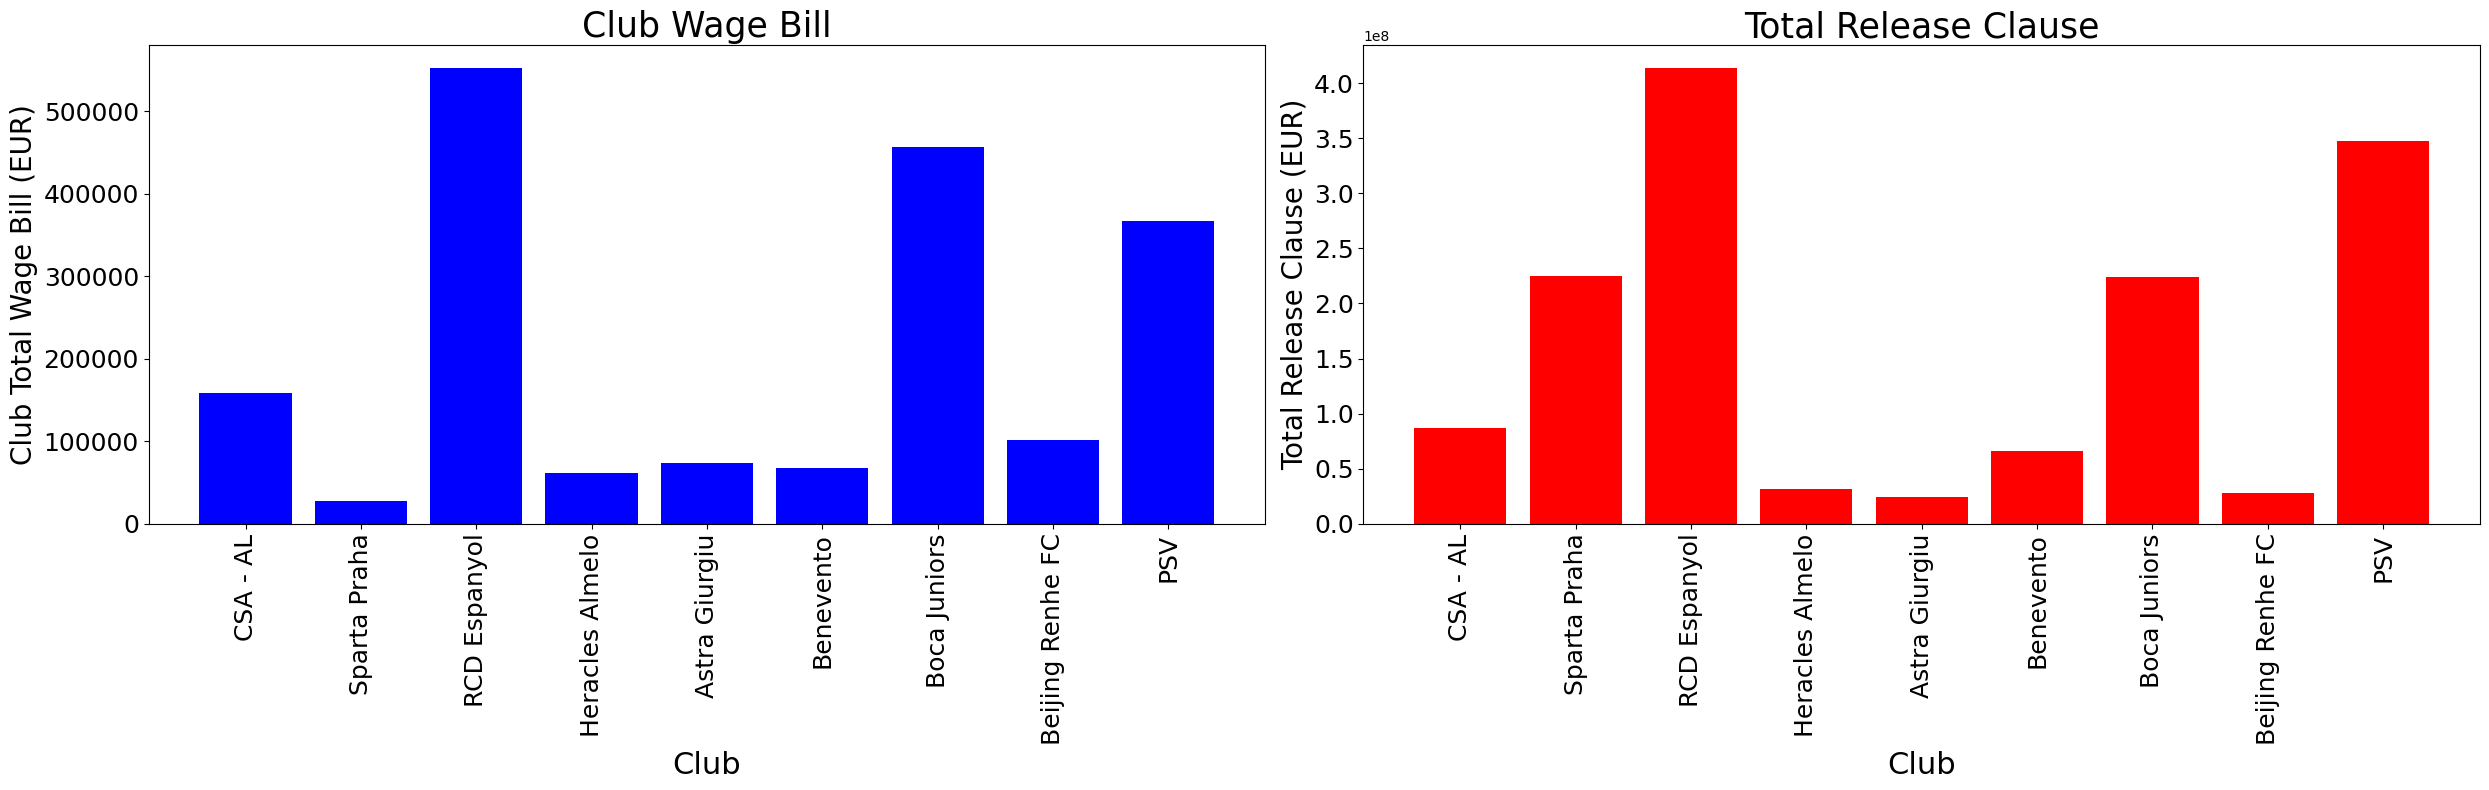

In [8]:
# Assuming your DataFrame is named 'df'
# Sort the DataFrame by 'club_total_wage_bill' in descending order
Eight_clubs_df = wages_df.sample(9)

# Select the top 8 clubs
top_8_clubs = Eight_clubs_df.head(8)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

# Plot the club total wage bill
ax1.bar(Eight_clubs_df['club'], Eight_clubs_df['club_total_wage_bill'], color='blue', alpha=1.0)
ax1.set_xlabel('Club', fontsize=22)
ax1.set_ylabel('Club Total Wage Bill (EUR)', fontsize=20)
ax1.set_title('Club Wage Bill', fontsize=25)
ax1.tick_params(axis='x', rotation=90, labelsize=18)
ax1.tick_params(axis='y', labelsize=18)

# Plot the total release clause
ax2.bar(Eight_clubs_df['club'], Eight_clubs_df['rels_total'], color='red', alpha=1.0)
ax2.set_xlabel('Club', fontsize=22)
ax2.set_ylabel('Total Release Clause (EUR)', fontsize=20)
ax2.set_title('Total Release Clause', fontsize=25)
ax2.tick_params(axis='x', rotation=90, labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
plt.tight_layout()
plt.show()



Now We want to check the highest avg speed and avg acceleration of the top 10 clubs

In [9]:
# Create a new df that is the copy of original df
speed_attrs_df = player_data.copy()
speed_attrs_df = speed_attrs_df.loc[:, ['sofifa_id', 'club', 'nationality', 'short_name', 'age', 'height_cm', 
'weight_kg', 'pace', 'movement_acceleration', 'movement_sprint_speed']]  # Keep only the desired columns
#This df is going to be used to create some visualizations of Fifa players body stats
speed_attrs_df.describe()

,sofifa_id,age,height_cm,weight_kg,pace,movement_acceleration,movement_sprint_speed
count,18278.000000,18278.000000,18278.000000,18278.000000,16242.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,67.700899,64.299923,64.415746
std,27960.200461,4.656964,6.756961,7.047744,11.297656,15.042232,14.847763
min,768.000000,16.000000,156.000000,50.000000,24.000000,12.000000,11.000000
25%,204445.500000,22.000000,177.000000,70.000000,61.000000,56.000000,57.000000
50%,226165.000000,25.000000,181.000000,75.000000,69.000000,67.000000,67.000000
75%,240795.750000,29.000000,186.000000,80.000000,75.000000,75.000000,75.000000
max,252905.000000,42.000000,205.000000,110.000000,96.000000,97.000000,96.000000


In [17]:
# Assuming 'speed_attrs_df' is your original DataFrame
club_averages_speed_stats = speed_attrs_df.groupby('club')[['pace', 'movement_sprint_speed', 'movement_acceleration']].mean().reset_index()
club_averages_speed_stats = club_averages_speed_stats.rename(columns={'pace': 'avg_pace', 'movement_sprint_speed': 'avg_movement_sprint_speed', 'movement_acceleration': 'avg_movement_acceleration'})

club_averages_speed_stats = club_averages_speed_stats.sort_values('avg_movement_sprint_speed', ascending=False)
club_averages_speed_stats.head(30).sort_values(by="club")

,club,avg_pace,avg_movement_sprint_speed,avg_movement_acceleration
7,1. FSV Mainz 05,71.733333,70.212121,69.212121
52,Arsenal,72.900000,71.454545,70.030303
70,Australia,73.000000,74.500000,71.500000
92,Borussia Dortmund,74.333333,71.322581,70.032258
125,CSA - AL,70.111111,70.500000,65.850000
128,Cameroon,74.800000,76.600000,72.600000
134,Celtic,75.160000,71.642857,70.928571
146,Chile,78.000000,79.000000,76.000000
164,Colchester United,73.153846,71.285714,70.250000
166,Colombia,73.000000,71.000000,76.000000


In [24]:

# Assuming 'speed_attrs_df' is your original DataFrame
nation_averages_speed_stats = speed_attrs_df.groupby('nationality')[['pace', 'movement_sprint_speed', 'movement_acceleration']].mean().reset_index()
nation_averages_speed_stats = nation_averages_speed_stats.rename(columns={'pace': 'avg_pace', 'movement_sprint_speed': 'avg_movement_sprint_speed', 'movement_acceleration': 'avg_movement_acceleration'})

nation_averages_speed_stats = nation_averages_speed_stats.sort_values('avg_movement_sprint_speed', ascending=False)
nation_averages_speed_stats.head(30)

,nationality,avg_pace,avg_movement_sprint_speed,avg_movement_acceleration
89,Liberia,89.000000,92.000000,86.000000
26,Chad,91.000000,91.000000,90.000000
21,Burundi,80.750000,81.250000,80.500000
131,Sierra Leone,78.600000,79.300000,77.800000
3,Angola,77.937500,78.750000,76.875000
145,Tanzania,78.000000,78.750000,77.250000
4,Antigua & Barbuda,78.857143,78.714286,78.714286
107,Namibia,76.500000,78.500000,74.500000
11,Barbados,78.000000,78.000000,78.000000
135,South Sudan,76.000000,78.000000,73.000000


<Figure size 1200x600 with 0 Axes>

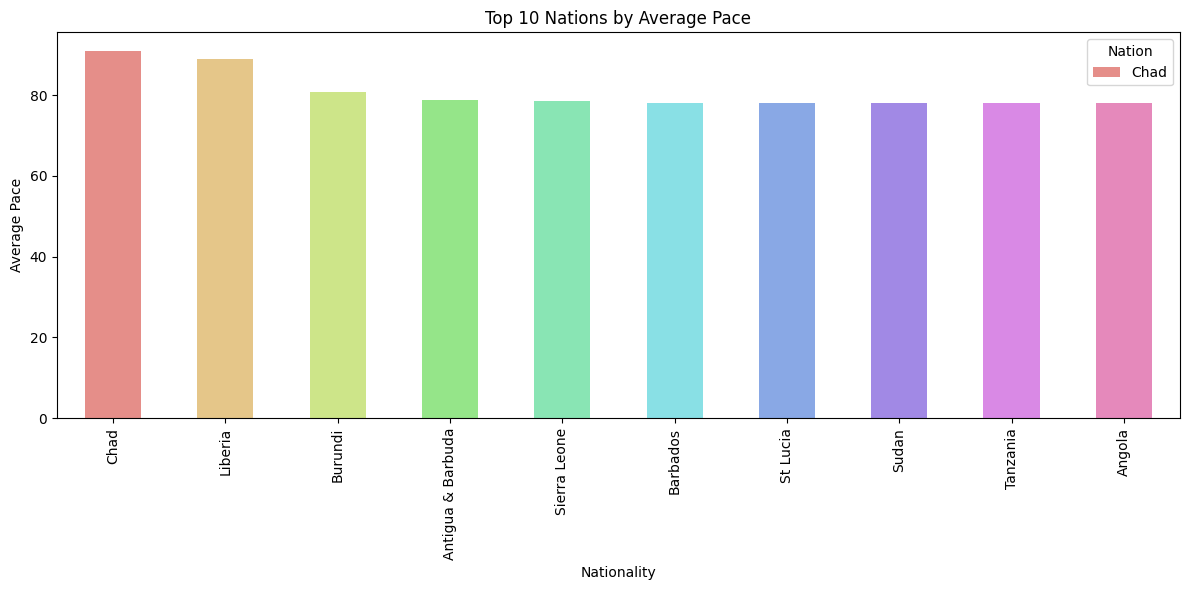

In [11]:
# Assuming 'club_averages_speed_stats' is your DataFrame
top_10_clubs = nation_averages_speed_stats.sort_values('avg_pace', ascending=False).head(10)

plt.figure(figsize=(12, 6))
colors = sns.color_palette("hls", 10)  # Generate 10 distinct colors
top_10_clubs.plot(kind='bar', x='nationality', y='avg_pace', figsize=(12, 6), color=colors, alpha=0.7)

plt.xlabel('Nationality')
plt.ylabel('Average Pace')
plt.title('Top 10 Nations by Average Pace')
plt.xticks(rotation=90)
plt.legend(top_10_clubs['nationality'], title='Nation')

plt.tight_layout()
plt.show()



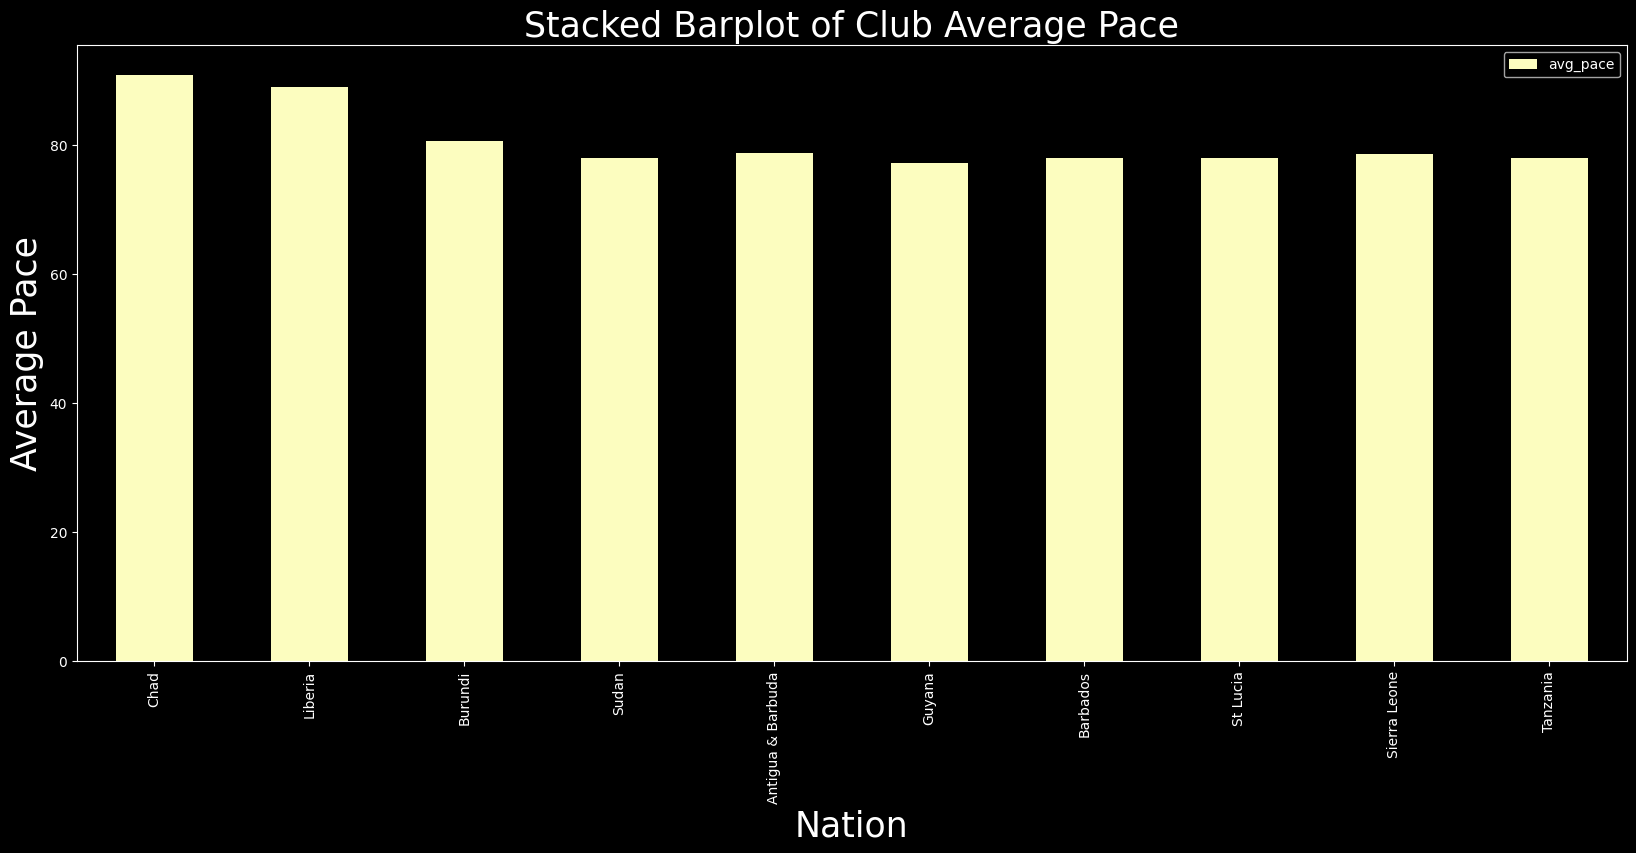

In [12]:
# Assuming you have the 'club_averages_speed_stats' dataframe
plt.style.use('dark_background')
nation_averages_speed_stats = nation_averages_speed_stats.sort_values('avg_movement_acceleration', ascending=False).head(10)

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(20, 8))
nation_averages_speed_stats.plot(x='nationality', y='avg_pace', kind='bar', stacked=True, colormap='magma_r', ax=ax)


# Set the title and axis labels
plt.title('Stacked Barplot of Club Average Pace', fontsize=25)
plt.xlabel('Nation', fontsize=25)
plt.ylabel('Average Pace', fontsize=25)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)


# Show the plot
plt.show()


We are able to gain some insight from the visualizations such as nations and clubs with highest average pace, agility, sprint speed, and acceleration. We were also able to see which clubs had the highest wage bills. 

## More interesting Visualizations

Now we are going to try to create some interactive plots. Using the library **bokeh**

In [19]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show

output_notebook()

Loading BokehJS ...

In [107]:
Eight_clubs_df['club_total_wage_bill_in_thousands'] = Eight_clubs_df['club_total_wage_bill'] / 1000 
Eight_clubs_df['club_total_wage_bill_in_thousands']

746     158.0
971      28.0
425     552.0
4258     61.0
5246     73.0
2391     67.0
287     456.0
681     101.0
247     367.0
Name: club_total_wage_bill_in_thousands, dtype: float64

In [112]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Bright6,Colorblind3
import pandas as pd
from bokeh.plotting import figure, show, output_notebook, output_file
from bokeh.models import PanTool, ZoomInTool, ZoomOutTool, ResetTool

# Assuming your data is in a DataFrame named 'Eight_clubs_df'
data = Eight_clubs_df[['club', 'wage_eur', 'release_clause_eur', 
                       'contract_valid_until', 'rels_total', 'club_total_wage_bill', 'club_total_wage_bill_in_thousands']]
# Assuming your data is in a DataFrame named 'Eight_clubs_df'
data = Eight_clubs_df.copy()  # Make a copy to avoid modifying the original DataFrame

# Create a custom palette with more colors
custom_palette = Bright6 + Colorblind3

# Add the custom colors to the DataFrame
data['color'] = custom_palette

#clubs_ls = data['club'].tolist()
data = data.to_dict('list')
source = ColumnDataSource(data=data)

# Create the Bokeh plot
output_notebook()
p = figure(x_range=data['club'], y_range=(0, 1000), width=900 , height=350, title="Total Wage bill of Club",
           toolbar_location=None, tools="", y_axis_label="club_total_wage_bill_in_thousands")

# Plot the lines
p.vbar(x='club', top='club_total_wage_bill_in_thousands', width=0.5, color='color', legend_field="club", source=source)
# p.line(data['rels_total'], data['club_total_wage_bill'], legend_label="club_total_wage & rels_total", line_width=4, color="red")

# Add a legend
p.xaxis.axis_label = "Clubs"
p.xaxis.major_label_text_font_size = "10pt"
p.yaxis.major_label_text_font_size = "10pt"
p.legend.border_line_color = "black"
p.legend.location = "top_left"
p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
# Add interactive tools
p.add_tools(PanTool(), ZoomInTool(), ZoomOutTool(), ResetTool())

# Display the plot in the notebook
output_file("bar_chart.html")
show(p)


Loading BokehJS ...